In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Importing data 
df = pd.read_csv('data/breast_cancer_data.csv')

In [30]:
df = df.drop('Unnamed: 32',axis=1)
# Generating a binary 0/1 column in the dataframe for the diagnosis
df['binary_diag'] = np.where(df['diagnosis']== 'M', 1 , 0)
df = df.drop(['diagnosis','id'],axis=1)

In [31]:
# Train test split
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('binary_diag',axis=1)
y = df['binary_diag']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
# Scaling the features in my training set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import clone_model

In [36]:
# Generating and compiling the model 

model = Sequential()

# Hidden Layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
# Running model initially for a lot of epochs to force overfitting
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),batch_size=128)

299/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0405 - val_loss: 0.1468
Epoch 300/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0400 - val_loss: 0.1343
Epoch 301/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0404 - val_loss: 0.1335
Epoch 302/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0406 - val_loss: 0.1374
Epoch 303/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0391 - val_loss: 0.1483
Epoch 304/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0397 - val_loss: 0.1479
Epoch 305/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0391 - val_loss: 0.1392
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0413 - val_loss: 0.1301
Epoch 307/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.1425
Epoch 308/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0378 - val_loss: 0.1631
Epoch 309/500
4/

In [38]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

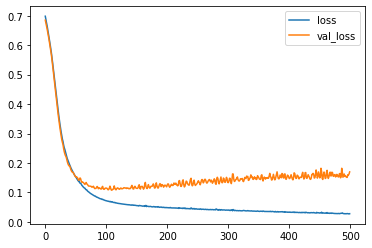

In [39]:
# Validation loss clearly diverges from training loss, therefore suggesting that we've overfit to the training data. i.e. our solution isnt a global one, its only works for the training data
losses.plot()

In [40]:
# To avoid the overfitting we're going to use early stopping when we run the model next.
# Generating and compiling the model 

model = Sequential()

# Hidden Layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

"""
monitor: value to use for the early stopping
mode: in 'min' the early stopping is implemented when the quantity being monitored reaches its minimum
patience: number of epochs with no improvement until the network stops training"""


In [42]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [43]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),batch_size=128,callbacks=early_stop)

Epoch 1/500
4/4 [==============================] - 0s 31ms/step - loss: 0.6920 - val_loss: 0.6858
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6798 - val_loss: 0.6745
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6687 - val_loss: 0.6645
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6580 - val_loss: 0.6538
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6468 - val_loss: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6344 - val_loss: 0.6291
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6216 - val_loss: 0.6164
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6083 - val_loss: 0.6031
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5944 - val_loss: 0.5889
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5796 - val_loss: 0.5738
Epoch 11/500
4/4 [==========

In [44]:
hist = pd.DataFrame(model.history.history)

<AxesSubplot:>

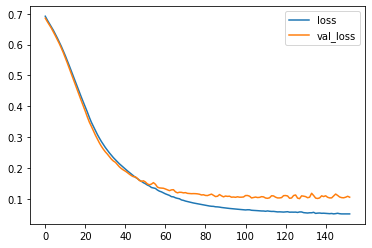

In [45]:
hist.plot()

""" Using Dropout Regularisation :
Dropout is a concept used to regularise a NN to prevent overfitting. 
Dropout specifies a probability that a neuron within a layer is 'turned off' during training i.e. the weights and biases arent updated during an epoch. 
It has the effect of, within each epoch, making it so a 'different' layer is configured to fit the data, therefore reducing overfitting to the training set. 
It also has the effect of increasing value of the weights in the network because the neurons that are active need to account for the ones that are turned off during training. Therefore, when you come to predict using the model the weights need to be scaled by the probability used in Dropout. i.e. if a 0.5 probability is used the weights are scaled by 0.5 before predicting. keras does this automatically during training. 
Note: a value of 1.0 means no dropout, a value of 0 means no output from the layer

Tips: 
- Typically a good dropout rate is between 0.5 and 0.8 for nodes in a hidden layer
- If using in large networks you may need to increase the number of nodes in the layer by the inverse of the dropout rate.
- Do a grid search of the best dropout parameters. 
- Very large weights in a network suggest over fitting because one node is accounting for most of the changes (?), can use max-norm regularisation to prevent the norm of the weights in a layer from getting too big. 

Note you can also use model checkpoints to save the model at a specific point (i.e. best model) as well. then you can load the model in and use it to predict. 
 """

In [52]:
# creating the model with dropout regularisation
# Generating and compiling the model 

model = Sequential()

# Hidden Layers
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),batch_size=128,callbacks=early_stop)

/4 [==============================] - 0s 8ms/step - loss: 0.2969 - accuracy: 0.8944 - val_loss: 0.2215 - val_accuracy: 0.9371
Epoch 58/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3077 - accuracy: 0.8732 - val_loss: 0.2167 - val_accuracy: 0.9441
Epoch 59/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2860 - accuracy: 0.9178 - val_loss: 0.2102 - val_accuracy: 0.9510
Epoch 60/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2934 - accuracy: 0.8991 - val_loss: 0.2039 - val_accuracy: 0.9580
Epoch 61/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2868 - accuracy: 0.8944 - val_loss: 0.1987 - val_accuracy: 0.9580
Epoch 62/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2750 - accuracy: 0.9014 - val_loss: 0.1946 - val_accuracy: 0.9580
Epoch 63/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2838 - accuracy: 0.8967 - val_loss: 0.1904 - val_accuracy: 0.9510
Epoch 64/500
4/4 [================

In [54]:
hist = pd.DataFrame(model.history.history)

<AxesSubplot:>

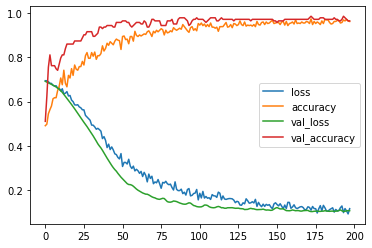

In [55]:
hist.plot()

In [60]:
# Predicting on test dataset
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
confusion_matrix(predictions,y_test)

array([[84,  1],
       [ 4, 54]])

In [64]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       0.98      0.93      0.96        58

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

